In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import SmoothSphereBivariateSpline
from main import *
fn = "data/randomSamplSta10pnts2m.csv"

In [2]:
%%time
x, y, z = importCsv(fn)

CPU times: user 8.7 s, sys: 171 ms, total: 8.87 s
Wall time: 8.86 s


In [3]:
%%time
print len(x)
r, az, el = cart2sph(x, y, z)

1757928
min/max lats (radians) -1.4279925761709291 -0.0158447312050038
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.086160901207906 4.197236672327719
lats range (radians) 0 6.28318530718
CPU times: user 1min 18s, sys: 1.73 s, total: 1min 19s
Wall time: 1min 18s


Text(0.5,0,'y')

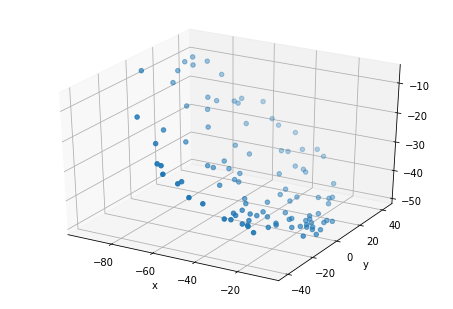

In [4]:
n = 100
fig = plt.figure()
ax = Axes3D(fig)
#ax.view_init(30, 60)
ax.scatter(x[:n], y[:n], z[:n])
plt.xlabel('x'); plt.ylabel('y')

Text(0.5,0,'y')

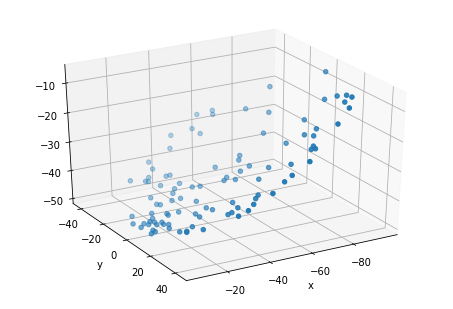

In [5]:
n = 100
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(30, 60)
ax.scatter(x[:n], y[:n], z[:n])
plt.xlabel('x'); plt.ylabel('y')

In [6]:
# az == lat, el = lng
n

100

In [7]:
# Coordinates must be given in radians. Theta must lie within the interval (0, pi), and phi must lie within the interval (0, 2pi).

In [8]:
#n = 100
lut = SmoothSphereBivariateSpline(-az[:n], el[:n], r[:n], s=1)

In [9]:
azm = np.linspace(np.min(-az[:n]), np.max(-az[:n]), n)
elm = np.linspace(np.min(el[:n]), np.max(el[:n]), n)

In [10]:
rm = lut(azm, elm)

In [11]:
print azm.shape, rm.shape

(100,) (100, 100)


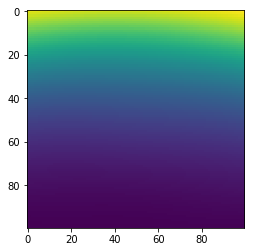

In [12]:
f = plt.figure()
ax = f.gca()
ax.imshow(rm)

In [13]:
azg, elg = np.meshgrid(azm, elm)

In [14]:
#f = plt.figure()
#ax = Axes3D(f)
print azg.flatten().shape, elg.flatten().shape, rm.flatten().shape

(10000,) (10000,) (10000,)


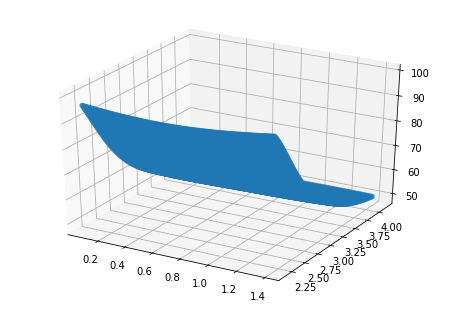

In [15]:
f = plt.figure()
ax = Axes3D(f)
ax.scatter(azg.flatten(), elg.flatten(), rm.flatten())

In [16]:
azNew, elNew, rNew = azg.flatten(), elg.flatten(), rm.flatten()

In [17]:
xNew, yNew, zNew = sph2cart(-azNew, elNew, rNew)

min/max az (radians) -1.3979849716294377 -0.07269871972820732
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.14941199279054 4.133641418422428
az range (radians) 0 6.28318530718


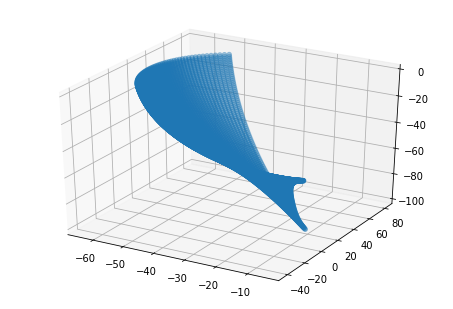

In [18]:
f = plt.figure()
ax = Axes3D(f)
ax.scatter(xNew, yNew, zNew)

Text(0.5,0,'y')

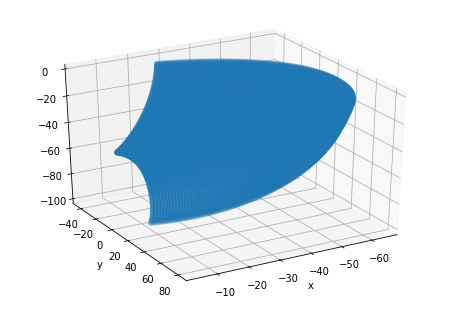

In [19]:
n = 100
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(30, 60)
ax.scatter(xNew, yNew, zNew)
plt.xlabel('x'); plt.ylabel('y')